<a href="https://colab.research.google.com/github/HamsWael/NLP_Proj/blob/main/Final_NLP_Project_MS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries and Dataset**

In [2]:
import pandas as pd
import numpy as np
import nltk
#used for tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#used for lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#used for Stemming
from nltk.stem import PorterStemmer
#used for removing stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
#used for removing punctuations
import string
#used for POS Tagging
nltk.download('averaged_perceptron_tagger')
#used for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, SimpleRNN, Concatenate


#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [3]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('valid.csv')

In [4]:
df = pd.concat([df1, df2, df3], axis=0)

In [5]:
df

,Id,Title,Body,Score,ViewCount,Label,LabelNum
0,197234,Drop\stop mobile data connection (non-wifi) by...,<p>Can I set Android 4.4.2 to drop mobile data...,0,34,android,0
1,114800,How to automatically crop text messages when S...,<p>Is there a way to prevent the Messages app ...,0,836,android,0
2,124532,Can't find text message that was to a group,<p>When John Doe texts to a group that include...,1,28,android,0
3,193875,Can't store contacts on my Android phone,<p>I was going through all of my installed app...,0,158,android,0
4,50332,Dropbox on Samsung Galaxy - where is the Setti...,"<p>On a Sony Xperia, the settings button in Dr...",1,963,android,0
...,...,...,...,...,...,...,...
11003,218151,Disable vibrations for notifications on Xiaomi...,<p>I have a Xiaomi Mi A3 on Android 9. I want ...,1,197,android,0
11004,102309,Download and run Android APK files,<p>I want to download BitTorrent Sync to synch...,0,408,android,0
11005,25096,Android apps keep crashing with android.databa...,"<p>Starting yesterday, my Galaxy s2 device run...",8,3374,android,0
11006,268441,Can you get viruses on iPhone from downloaded ...,<p>I downloaded an app for downloading things ...,1,1028,ios,1


## **Data Inspection and Cleaning (Dropping Duplicates and Null Values)**

In [6]:
num_duplicates = df.duplicated().sum()
num_duplicates

#Therefore, no duplicates are found in this dataset

0

In [7]:
df.isna().sum()
#No null values

Id           0
Title        0
Body         0
Score        0
ViewCount    0
Label        0
LabelNum     0
dtype: int64

In [8]:
#Dropping unnecessary columns
#Drop ID column since its a unique identifier and would overfit/skew the model
df= df.drop('Id', axis=1)

In [9]:
#Dropping Label as we would have encoded it to what already exists in LabelNum Column
#0---> Android
#1---> ios
#ViewCount also has nth to do with the question answering and classification
# We'll keep 'Score'  For further work
df= df.drop(['ViewCount','Label'], axis=1)
df

,Title,Body,Score,LabelNum
0,Drop\stop mobile data connection (non-wifi) by...,<p>Can I set Android 4.4.2 to drop mobile data...,0,0
1,How to automatically crop text messages when S...,<p>Is there a way to prevent the Messages app ...,0,0
2,Can't find text message that was to a group,<p>When John Doe texts to a group that include...,1,0
3,Can't store contacts on my Android phone,<p>I was going through all of my installed app...,0,0
4,Dropbox on Samsung Galaxy - where is the Setti...,"<p>On a Sony Xperia, the settings button in Dr...",1,0
...,...,...,...,...
11003,Disable vibrations for notifications on Xiaomi...,<p>I have a Xiaomi Mi A3 on Android 9. I want ...,1,0
11004,Download and run Android APK files,<p>I want to download BitTorrent Sync to synch...,0,0
11005,Android apps keep crashing with android.databa...,"<p>Starting yesterday, my Galaxy s2 device run...",8,0
11006,Can you get viruses on iPhone from downloaded ...,<p>I downloaded an app for downloading things ...,1,1


In [10]:
df['Body'] = df['Body'].str.replace('<p>', '')
df

,Title,Body,Score,LabelNum
0,Drop\stop mobile data connection (non-wifi) by...,Can I set Android 4.4.2 to drop mobile data co...,0,0
1,How to automatically crop text messages when S...,Is there a way to prevent the Messages app fro...,0,0
2,Can't find text message that was to a group,When John Doe texts to a group that includes m...,1,0
3,Can't store contacts on my Android phone,I was going through all of my installed applic...,0,0
4,Dropbox on Samsung Galaxy - where is the Setti...,"On a Sony Xperia, the settings button in Dropb...",1,0
...,...,...,...,...
11003,Disable vibrations for notifications on Xiaomi...,I have a Xiaomi Mi A3 on Android 9. I want to ...,1,0
11004,Download and run Android APK files,I want to download BitTorrent Sync to synchron...,0,0
11005,Android apps keep crashing with android.databa...,"Starting yesterday, my Galaxy s2 device runnin...",8,0
11006,Can you get viruses on iPhone from downloaded ...,I downloaded an app for downloading things fro...,1,1


## **Data Analysis and Visualizations (Insights on Data)**

---



<Axes: >

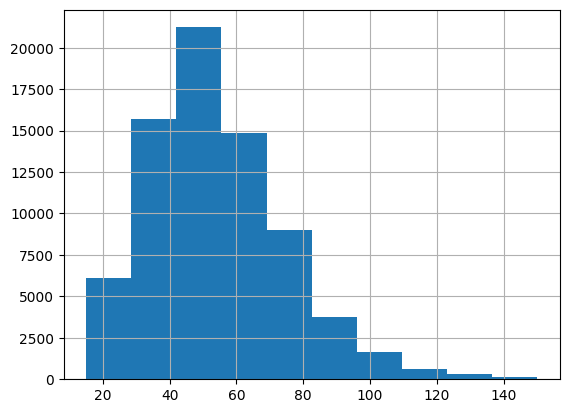

In [11]:
# Title Distribution of question lengths

df['Title'].str.len().hist()

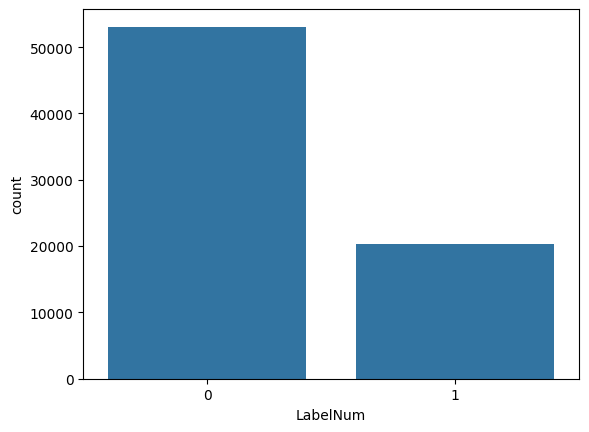

In [12]:
#The Below Count Plot shows that the dataset is imbalanced as it's obvious that android class is exceeding the ios by approximately 30,000 records.
# 0 = Android, 1 = IOS
sns.countplot(x='LabelNum', data=df)
plt.show()

### **Below is the WordCloud to Visualize the Most frequent words in questions asked 'Title' regarding both classes: ios and Android respectively)**

In [13]:
tmp1= df[df['LabelNum']==1]
tmp1

,Title,Body,Score,LabelNum
7,iPhone 5 iOS7 no sound only vibrates when ring...,Here is what I tried...</p>\n\n<ol>\n<li><code...,5,1
9,Is this an iCloud sync/backup or do I have a d...,What are these pictures showing my iPhone's sc...,1,1
10,Ping command with parameters from iPhone,How I can execute ping command with parameter ...,2,1
13,Transferring iPhone message history to new Mac?,My filesystem was corrupted when updating to H...,1,1
24,edit server in iphone exchange email,We used to use Mobile Iron to configure our us...,0,1
...,...,...,...,...
10981,Is there a way to force iPad to show a mobile ...,I'm trying to access an internal website to vi...,3,1
10982,Windows: Can I set the folder where iTunes bac...,I have a PC running Windows 10 with 2 Hard dri...,3,1
10990,Sky blue dot next to app,I got an iPhone 7+ on iOS 10.2 and I just got ...,4,1
10995,How do I find out which folder an app is in in...,"In older versions of iOS, if I searched for an...",14,1


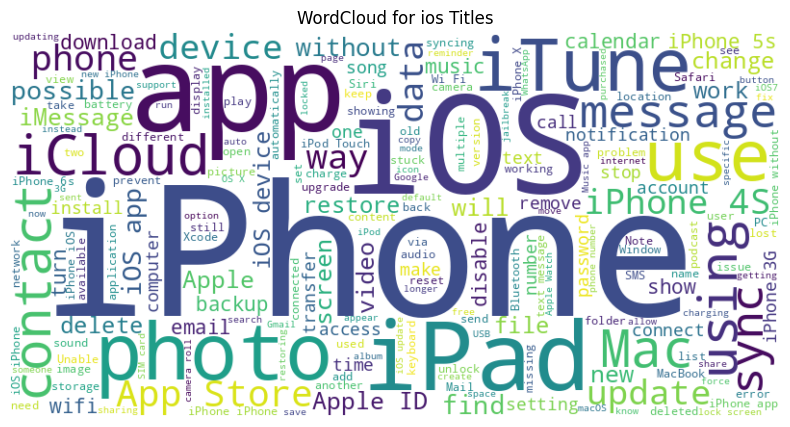

In [14]:
wc_txt = ' '.join(tmp1['Title'])


wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(wc_txt)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for ios Titles')
plt.axis("off")
plt.show()

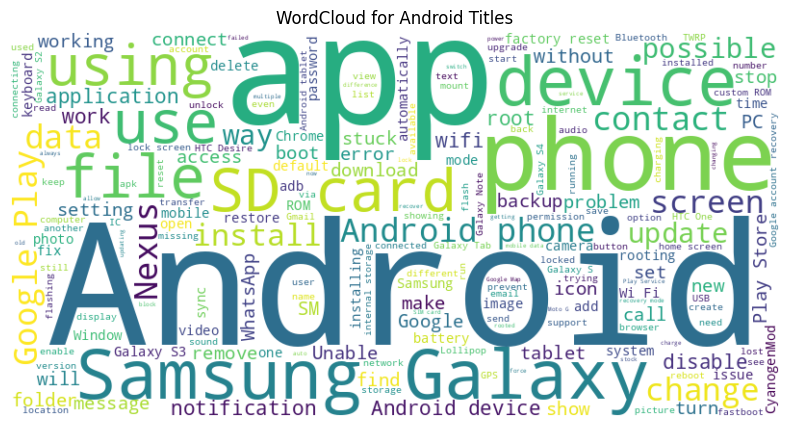

In [15]:
tmp2= df[df['LabelNum']==0]
wc_txt1 = ' '.join(tmp2['Title'])


wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(wc_txt1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for Android Titles')
plt.axis("off")
plt.show()


## **Text Preprocessing**

First We'll concatenate the 2 columns 'Title' and 'Body' to have the text in one column (for simplicity and more informative data for training).

In [16]:
#df['txt_Concatenated'] = pd.concat([df['Title'], df['Body']], axis=1)

df['txt_Concatenated'] = df['Title'] + df['Body']


desired_columns = ['txt_Concatenated', 'Score', 'LabelNum']

# Reindex the DataFrame
df = df.reindex(columns=desired_columns)
df


,txt_Concatenated,Score,LabelNum
0,Drop\stop mobile data connection (non-wifi) by...,0,0
1,How to automatically crop text messages when S...,0,0
2,Can't find text message that was to a groupWhe...,1,0
3,Can't store contacts on my Android phoneI was ...,0,0
4,Dropbox on Samsung Galaxy - where is the Setti...,1,0
...,...,...,...
11003,Disable vibrations for notifications on Xiaomi...,1,0
11004,Download and run Android APK filesI want to do...,0,0
11005,Android apps keep crashing with android.databa...,8,0
11006,Can you get viruses on iPhone from downloaded ...,1,1


Here, we created a function that takes a text as an input and do the preprocessing. ( Standardizing the text ' Lower Case' , removing punctuation , tokenizing the text, removing stop words and lemmatization )

In [17]:
def preprocess_text(text):
    # Standardizing text to Lowercase
    text = text.lower()
    # Removing the punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizing the text
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Applying preprocessing to the dataset

df['txt_Concatenated'] = df['txt_Concatenated'].apply(preprocess_text)

In [18]:
df

,txt_Concatenated,Score,LabelNum
0,"[dropstop, mobile, data, connection, nonwifi, ...",0,0
1,"[automatically, crop, text, message, sm, chara...",0,0
2,"[cant, find, text, message, groupwhen, john, d...",1,0
3,"[cant, store, contact, android, phonei, going,...",0,0
4,"[dropbox, samsung, galaxy, setting, buttonon, ...",1,0
...,...,...,...
11003,"[disable, vibration, notification, xiaomi, mi,...",1,0
11004,"[download, run, android, apk, filesi, want, do...",0,0
11005,"[android, apps, keep, crashing, androiddatabas...",8,0
11006,"[get, virus, iphone, downloaded, appi, downloa...",1,1


Training a Word2Vec Model to convert the text into its numerical Representation
(Word Embedding)

In [19]:

import gensim
from gensim.models import Word2Vec
# Training a Word2Vec model with a vector size of 100
sentences = df['txt_Concatenated'].tolist()
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# creating a Function to convert sentences to the average of their word vectors
def sentence_to_avg_vector(sentence):
    vectors = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if len(vectors) > 0 else np.zeros(100)

Resulting_Vectors = np.array([sentence_to_avg_vector(sentence) for sentence in sentences])


In [20]:
Resulting_Vectors

array([[ 1.0166194 ,  1.5930845 , -0.16051413, ..., -0.3220234 ,
         0.35284796,  0.72307634],
       [ 1.123724  ,  2.5170949 , -0.25199008, ..., -0.35289535,
         0.08950842, -0.38245296],
       [ 0.7088074 ,  2.403312  , -0.30885723, ..., -0.41211787,
        -0.4560729 , -0.6023427 ],
       ...,
       [ 0.7053586 ,  0.7364668 , -0.2808236 , ..., -0.22677502,
         0.3912683 ,  0.5631373 ],
       [ 1.2523965 ,  1.6723537 , -0.15821514, ...,  0.1642752 ,
         0.5111507 ,  0.40103722],
       [ 0.84566516,  1.4925274 , -0.63777786, ..., -0.41319183,
        -0.32444426,  0.25579965]], dtype=float32)

Preparing Labels and Splitting Data into Training and Testing

In [21]:
from sklearn.model_selection import train_test_split
labels = df['LabelNum'].values
X_train, X_test, y_train, y_test = train_test_split(Resulting_Vectors, labels, test_size=0.2, random_state=42)

Building and Training the Neural Network (Binary Classification Model)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


timesteps = 1  # Assuming each sample is one timestep
features = Resulting_Vectors.shape[1]

X_train_lstm = np.reshape(X_train, (X_train.shape[0], timesteps, features))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], timesteps, features))

model = Sequential()
# LSTM layer with 64 units, input_shape is the shape of each sample in the dataset
model.add(LSTM(64, input_shape=(timesteps, features)))
model.add(Dropout(0.2))
# Dense layer for further processing
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
# Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1468/1468 [==============================] - 8s 4ms/step - loss: -1715.3485 - accuracy: 0.2618 - val_loss: -4700.6548 - val_accuracy: 0.2688
Epoch 2/10
1468/1468 [==============================] - 7s 5ms/step - loss: -10606.1094 - accuracy: 0.2618 - val_loss: -16482.7520 - val_accuracy: 0.2689
Epoch 3/10
1468/1468 [==============================] - 5s 3ms/step - loss: -25590.5410 - accuracy: 0.2619 - val_loss: -33151.8047 - val_accuracy: 0.2691
Epoch 4/10
1468/1468 [==============================] - 6s 4ms/step - loss: -45775.1992 - accuracy: 0.2618 - val_loss: -54894.5195 - val_accuracy: 0.2688
Epoch 5/10
1468/1468 [==============================] - 6s 4ms/step - loss: -71246.3438 - accuracy: 0.2621 - val_loss: -81431.6797 - val_accuracy: 0.2688
Epoch 6/10
1468/1468 [==============================] - 5s 4ms/step - loss: -101449.4531 - accuracy: 0.2620 - val_loss: -112008.1719 - val_accuracy: 0.2693
Epoch 7/10
1468/1468 [==============================] - 7s 5ms/step - loss: 

In [22]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# model = Sequential()
# # Word2Vec vector size is 100
# model.add(Dense(64, activation='relu', input_dim=100))
# model.add(Dropout(0.2))
# # Sigmoid for binary classification
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1468/1468 [==============================] - 4s 2ms/step - loss: 0.1207 - accuracy: 0.9571 - val_loss: 0.0886 - val_accuracy: 0.9688
Epoch 2/10
1468/1468 [==============================] - 3s 2ms/step - loss: 0.0856 - accuracy: 0.9705 - val_loss: 0.0830 - val_accuracy: 0.9691
Epoch 3/10
1468/1468 [==============================] - 4s 3ms/step - loss: 0.0817 - accuracy: 0.9716 - val_loss: 0.0919 - val_accuracy: 0.9659
Epoch 4/10
1468/1468 [==============================] - 3s 2ms/step - loss: 0.0790 - accuracy: 0.9723 - val_loss: 0.0813 - val_accuracy: 0.9702
Epoch 5/10
1468/1468 [==============================] - 3s 2ms/step - loss: 0.0762 - accuracy: 0.9736 - val_loss: 0.0802 - val_accuracy: 0.9710
Epoch 6/10
1468/1468 [==============================] - 3s 2ms/step - loss: 0.0743 - accuracy: 0.9737 - val_loss: 0.0798 - val_accuracy: 0.9704
Epoch 7/10
1468/1468 [==============================] - 4s 3ms/step - loss: 0.0742 - accuracy: 0.9736 - val_loss: 0.0790 - val_accuracy:

Evaluating the Model

In [56]:
loss, accuracy = model.evaluate(X_test_lstm, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

459/459 [==============================] - 1s 2ms/step - loss: -300512.2812 - accuracy: 0.2549
Test Loss: -300512.28125
Test Accuracy: 0.2548712491989136


In [64]:
#Old Evaluation


# score, acc = model.evaluate(X_test, y_test, batch_size=32)
# print('Test score:', score)
# print('Test accuracy:', acc)

Prediction Testing (Trial)
Real Life Questions as input to the Binary Classification Model  

In [43]:
def map_output_to_label(output):
    if output < 0.5:
        return 'Android'
    else:
        return 'iOS'

In [58]:
# This is an ios Question
question1 = ["How does iOS differ from other mobile operating systems?"]
processed_question = preprocess_text(question1[0])
# Converting question to vector
question_vector = np.array([sentence_to_avg_vector(processed_question)])
#predicted_label1 = model.predict(question_vector)
#print("Predicted Label:", map_output_to_label(predicted_label1[0][0]))
question_vector_lstm = np.reshape(question_vector, (question_vector.shape[0], 1, question_vector.shape[1]))

# Predict the label
predicted_label1 = model.predict(question_vector_lstm)

# Map the output to labels
predicted_label = map_output_to_label(predicted_label1[0][0])

print("Predicted Label:", predicted_label)
#(Correctly predicted by the Model)

1/1 [==============================] - 0s 386ms/step
Predicted Label: iOS


In [25]:
# A function to convert euler numbers to normal numbers
def euler_to_normal(euler_number):
    return format(euler_number, '.10f')

In [62]:
# This is an Android Question
question2 = ["What are the key features introduced in the latest version of Android?"]
processed_question = preprocess_text(question2[0])
question_vector = np.array([sentence_to_avg_vector(processed_question)])
# predicted_label2 = model.predict(question_vector)
# print("Predicted Label:", map_output_to_label(predicted_label2[0][0]))
question_vector_lstm = np.reshape(question_vector, (question_vector.shape[0], 1, question_vector.shape[1]))

# Predict the label
predicted_label1 = model.predict(question_vector_lstm)

# Map the output to labels
predicted_label = map_output_to_label(predicted_label2[0][0])

print("Predicted Label:", predicted_label)
print("Prediction Value:",euler_to_normal(predicted_label2[0][0]))

#(Correctly predicted by the Model)

1/1 [==============================] - 0s 22ms/step
Predicted Label: Android
Prediction Value: 0.0000013012


In [63]:
# This is an Android Question
question3 = ["Can you discuss the latest updates to the Google Play Store?"]
processed_question = preprocess_text(question3[0])
question_vector = np.array([sentence_to_avg_vector(processed_question)])
# predicted_label3 = model.predict(question_vector)
# print("Predicted Label:", map_output_to_label(predicted_label3[0][0]))
question_vector_lstm = np.reshape(question_vector, (question_vector.shape[0], 1, question_vector.shape[1]))

# Predict the label
predicted_label1 = model.predict(question_vector_lstm)

# Map the output to labels
predicted_label = map_output_to_label(predicted_label3[0][0])

print("Predicted Label:", predicted_label)
print("Prediction Value:",euler_to_normal(predicted_label3[0][0]))


#(Correctly predicted by the Model)

1/1 [==============================] - 0s 46ms/step
Predicted Label: Android
Prediction Value: 0.0000426197


---------------------------------------------------------------------------------------------------------------------------------------------------------------

 ** The Below Cells belong to A Regression model that predicts the score of a question based on the trained text data **

 ***Building and Training the Regression Model***

First, Specifying the target class ---> y  and vector arrays --> X

1- Input of the Regression Model -> the Question

In [28]:
#In the Regression model, our inputs would be the question
X = np.array([sentence_to_avg_vector(sentence) for sentence in sentences])
y = df['Score'].values  # The numerical column you want to predict

Train-Test Splitting the data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model_Reg = Sequential()
model_Reg.add(Dense(64, activation='relu', input_dim = 100))
model_Reg.add(Dropout(0.2))
model_Reg.add(Dense(1))  # Single output neuron for regression; no activation function

model_Reg.compile(optimizer='adam', loss='mean_squared_error')
model_Reg.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1468/1468 [==============================] - 4s 2ms/step - loss: 29.8742 - val_loss: 29.7661
Epoch 2/10
1468/1468 [==============================] - 3s 2ms/step - loss: 29.5621 - val_loss: 29.8538
Epoch 3/10
1468/1468 [==============================] - 4s 3ms/step - loss: 29.4603 - val_loss: 29.5387
Epoch 4/10
1468/1468 [==============================] - 3s 2ms/step - loss: 29.4425 - val_loss: 29.4439
Epoch 5/10
1468/1468 [==============================] - 3s 2ms/step - loss: 29.3192 - val_loss: 29.6010
Epoch 6/10
1468/1468 [==============================] - 3s 2ms/step - loss: 29.2887 - val_loss: 29.4526
Epoch 7/10
1468/1468 [==============================] - 5s 3ms/step - loss: 29.2132 - val_loss: 29.4055
Epoch 8/10
1468/1468 [==============================] - 3s 2ms/step - loss: 29.1447 - val_loss: 29.5240
Epoch 9/10
1468/1468 [==============================] - 3s 2ms/step - loss: 29.0847 - val_loss: 29.4393
Epoch 10/10
1468/1468 [==============================] - 3s 2ms/

Using Mean Squared Error to Calculate the loss in the regression model

In [31]:
mse = model_Reg.evaluate(X_test, y_test)
print('Test MSE:', mse)

459/459 [==============================] - 1s 1ms/step - loss: 43.4585
Test MSE: 43.458465576171875


Prediction Testing (Trial)   Real Life Questions as input to the regression model

In [36]:
question4 = ["How does iOS differ from other mobile operating systems?"]
processed_question = preprocess_text(question4[0])
# Converting question to vector
question_vector = np.array([sentence_to_avg_vector(processed_question)])
predicted_score = model_Reg.predict(question_vector)
print("Predicted Score:", np.round(predicted_score[0][0]))

1/1 [==============================] - 0s 19ms/step
Predicted Score: 2.0


In [37]:
question5 = ["What are the key features introduced in the latest version of Android?"]
processed_question = preprocess_text(question5[0])
question_vector = np.array([sentence_to_avg_vector(processed_question)])
predicted_score = model_Reg.predict(question_vector)
print("Predicted Score:", np.round(predicted_score[0][0]))

1/1 [==============================] - 0s 21ms/step
Predicted Score: 4.0


In [38]:
question6 = ["Can you discuss the latest updates to the Google Play Store?"]
processed_question = preprocess_text(question6[0])
question_vector = np.array([sentence_to_avg_vector(processed_question)])
predicted_score = model_Reg.predict(question_vector)
print("Predicted Score:", np.round(predicted_score[0][0]))

1/1 [==============================] - 0s 31ms/step
Predicted Score: 3.0


In [39]:
question7 = ["Can't find text message that was to a group"]
processed_question = preprocess_text(question7[0])
question_vector = np.array([sentence_to_avg_vector(processed_question)])
predicted_score = model_Reg.predict(question_vector)
print("Predicted Score:", np.round(predicted_score[0][0]))

1/1 [==============================] - 0s 20ms/step
Predicted Score: 2.0
